In [1]:
import pandas as pd
from scipy import stats
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import preprocessing
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_excel("A:\Downloads\Chapter4_ GIP_EUR_DataSet.xlsx")
df.describe()

,GIP (BCFperSection),EURper1000ft
count,200.00000,200.000000
mean,199.84800,2.201754
std,86.67358,1.132611
min,49.50000,0.043860
25%,136.95000,1.524123
50%,202.95000,2.192982
75%,257.40000,3.201754
max,452.10000,4.342105


In [3]:
df

,GIP (BCFperSection),EURper1000ft
0,49.5,1.710526
1,49.5,3.552632
2,52.8,0.263158
3,52.8,3.377193
4,56.1,1.754386
...,...,...
195,396.0,3.464912
196,415.8,1.228070
197,415.8,3.245614
198,452.1,0.789474


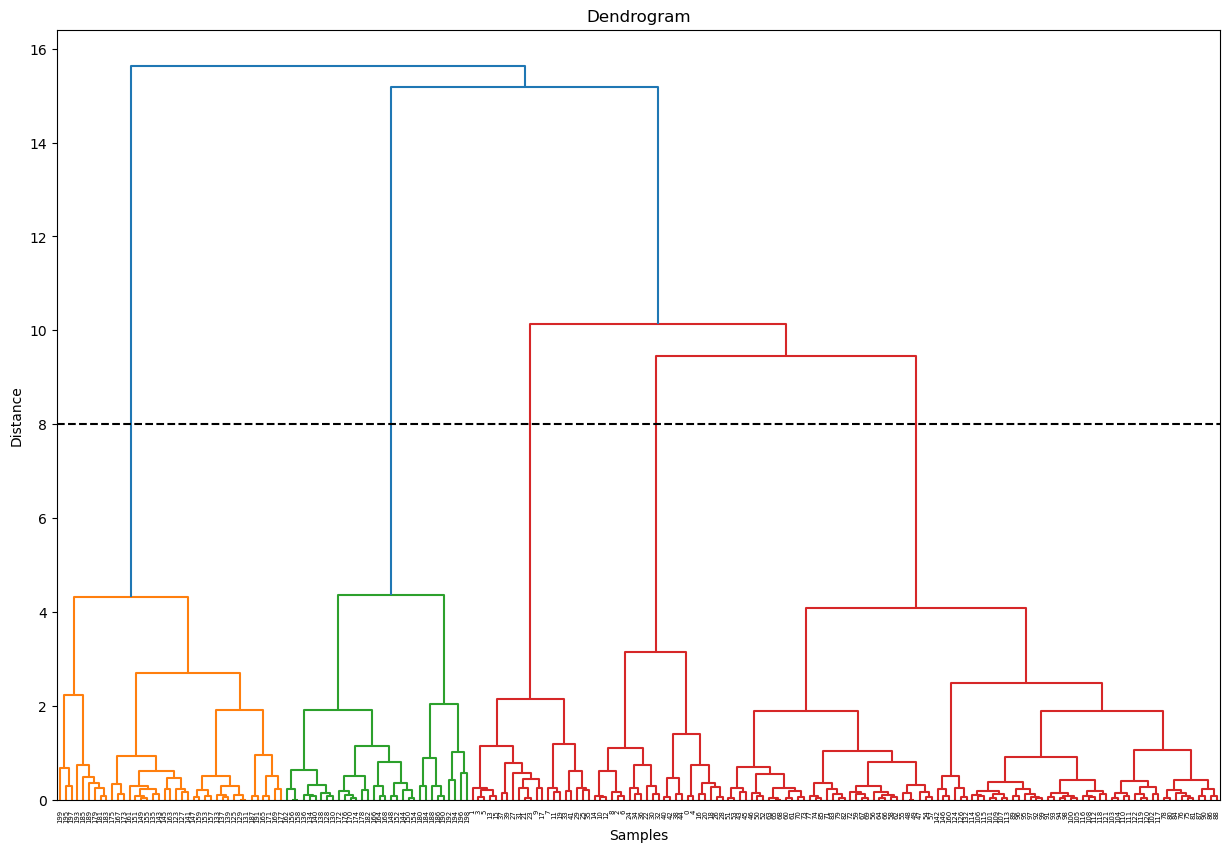

In [4]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_scaled=scaler.fit(df)
df_scaled=scaler.transform(df)
# df_scaled
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(15, 10))
dend = shc.dendrogram(shc.linkage(df_scaled, method='ward'))
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.title("Dendrogram")
plt.axhline(y=8, color='k', linestyle='--')

In [5]:
from sklearn.cluster import AgglomerativeClustering
HC = AgglomerativeClustering(n_clusters=5, linkage='ward')
HC=HC.fit_predict(df_scaled)
HC

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int64)

In [6]:
df_scaled= pd.DataFrame(df_scaled,columns=df.columns[0:2])
df_scaled['Clusters']=HC
df_scaled

,GIP (BCFperSection),EURper1000ft,Clusters
0,-1.738999,-0.434801,4
1,-1.738999,1.195704,3
2,-1.700830,-1.715913,4
3,-1.700830,1.040418,3
4,-1.662660,-0.395980,4
...,...,...,...
195,2.268791,1.118061,1
196,2.497807,-0.861839,0
197,2.497807,0.923953,1
198,2.917671,-1.250054,0


Text(0.5, 0, 'silhouette coefficient')

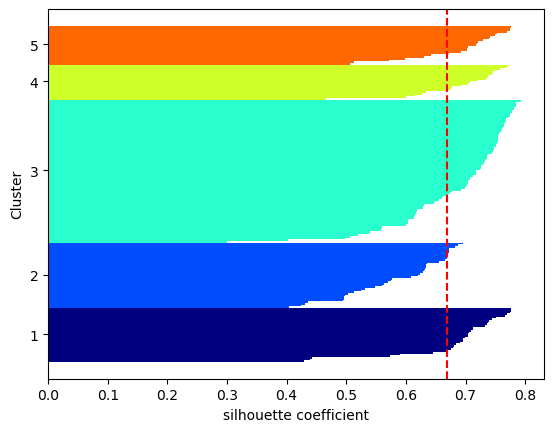

In [7]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples
cluster_labels=np.unique(HC)
n_clusters=cluster_labels.shape[0]
silhouette_vals=silhouette_samples(df_scaled,HC,metric='euclidean')
y_ax_lower, y_ax_upper=0,0
yticks=[]
for i, c in enumerate (cluster_labels):
    c_silhouette_vals= silhouette_vals[HC==c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color= cm.jet(float(i)/n_clusters)
    plt.barh(range(y_ax_lower,y_ax_upper),c_silhouette_vals,height=1,edgecolor='none',color=color)
    yticks.append((y_ax_lower+y_ax_upper)/2.)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg=np.mean(silhouette_vals)
plt.axvline(silhouette_avg,color="red",linestyle="--")
plt.yticks(yticks, cluster_labels +1)
plt.ylabel('Cluster')
plt.xlabel('silhouette coefficient')
# plt.show()

In [8]:
df.columns

Index(['GIP (BCFperSection)', 'EURper1000ft'], dtype='object')

In [9]:
df_scaled['GIP (BCFperSection)']=(df_scaled['GIP (BCFperSection)']*(df['GIP (BCFperSection)'].std())+df['GIP (BCFperSection)'].mean())
df_scaled['EURper1000ft']=(df_scaled['EURper1000ft']*(df['EURper1000ft'].std())+df['EURper1000ft'].mean())


In [10]:
Group_by=df_scaled.groupby(by='Clusters').mean()
Group_by

,GIP (BCFperSection),EURper1000ft
Clusters,,
0,295.279503,0.680128
1,285.792052,3.605628
2,184.139503,2.154681
3,82.520600,3.514146
4,86.520674,0.914015


In [11]:
df_scaled.groupby(by='Clusters').count()

,GIP (BCFperSection),EURper1000ft
Clusters,,
0,32,32
1,39,39
2,85,85
3,21,21
4,23,23
